### Boston Housing Dataset

The purpose of this assignment is to conduct an analysis on the boston housing dataset. The analysis will answer the question as to whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t.

#### About the dataset
The dataset used in this assessment has been downloaded from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php. The dataset contains US census housing data related to various housing in areas around the city of Boston.This dataset contains 506 rows and 14 columns. 

The fourteen columns consist of the following data: 

|Column Name |     Column Description                                                      |
|------------|-----------------------------------------------------------------------------|
|CRIM        |Crime rates per town (CRIM)                                                  |
|ZN          |Proportion of residential land zoned for lots over 25,000 sq.ft.             |
|Indus       |Proportion of non-retail business acres per town                             |
|Chas        |Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)        |
|Nox         |Nitrogen oxides concentration (parts per 10 million)                         |
|Rm          |Average number of rooms per dwelling                                         |
|Age         |Proportion of owner-occupied units built prior to 1940                       |
|Dis         |Weighted mean of distances to five Boston employment centres                 |
|Rad         |Index of accessibility to radial highways                                    |
|Tax         |Full-value property-tax rate per 10,000                                       |
|Ptratio     | pupil-teacher ratio by town                                                  |
|Black       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town               |
|Lstat       | lower status of the population (percent)                                     |
|Medv        | median value of owner-occupied homes in $1000s                               |
    
    
    
    
    
    
    
    

##### Import Data 
The Boston Housing dataset was imported into a jupyter notebook. The first five lines of the data were displayed as well as  the datatypes, to ensure that the data had been imported correctly.

In [83]:
# Author Róisín Anglim 29-09-19
# Import packages 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Add heading to csv file
headings = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#Read in data from a csv file
df = pd.read_csv('housing.csv',delim_whitespace=True,names = headings) 
#Print first 5 lines of imported data 
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [84]:
#Show data datatypes
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

##### Cleaning the Data
This step involved identifying missing,duplicate or unnesscary data in order to remove it from the analysis.Through using descriptive statistics on the data you can see that in some coulmns the min value is zero. This indicates missing or invalid data.From the data you can see coulmns ZN and CHAS have min values of zero.However CHAS indicates whether the house is along the river or not by assigning it as 1 or 0. ZN has been identified as having 372 cells with values equal to zero. ZN reprents the amount of zoned land and would ikely be zero.

In [85]:
# Show descriptive statistics to identify missing or invalid data.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [86]:
##### Identify the number of zero value cells
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
## Univariate Analysis
#Plot scatterplot data to identify outliers 

fig=plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')    
fig, ax = plt.subplots(figsize=(15,15), ncols=3, nrows=5)
sns.swarmplot(y="DIS",data=df,ax=ax[0][0])
sns.swarmplot(y="ZN",data=df, ax=ax[0][1])
sns.swarmplot(y="CHAS",data=df,ax=ax[0][2])
sns.swarmplot(y="NOX",data=df,ax=ax[1][0])
sns.swarmplot(y="RM",data=df,ax=ax[1][1])
sns.swarmplot(y="AGE",data=df,ax=ax[1][2])
sns.swarmplot(y="RAD",data=df,ax=ax[2][0])
sns.swarmplot(y="TAX",data=df,ax=ax[2][1])
sns.swarmplot(y="PTRATIO",data=df,ax=ax[2][2])
sns.swarmplot(y="B",data=df,ax=ax[3][0])
sns.swarmplot(y="LSTAT",data=df,ax=ax[3][1])
sns.swarmplot(y="MEDV",data=df,ax=ax[3][2])
sns.swarmplot(y="CRIM",data=df,ax=ax[4][0])
sns.swarmplot(y="NOX",data=df,ax=ax[4][1])
sns.swarmplot(y="MEDV",data=df,ax=ax[4][2])
sns.plt.show()

In [ ]:
###BI Variate analysis
##Create correlation matrix

plt.figure(figsize=(14,14))
#Add coolwarn colour and annotations for each correlation
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True);

#### Data Exploation and Analysis 
Based on the number high number of variables within the dataset a dimention reduction technique was used.

#### Principle Component Analysis
Principle component analysis (PCA) is a dimention reduction technique. It works by taking highly correlated variables and transforming them into linearly uncorrelated principal components. 

#### PCA Scalability
In order to prevent a large value from doiminating the results, the data was scaled.PCA is affected by scalability.

In [88]:
##### Scale data for PCA
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df)

##### Apply PCA to the dataset
PCA was applied to the dataset and based on the original number of variables, in ths case 14. PCA returned the same number of principle components.

In [89]:
#PCA is applied to all variables within the dataset
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-2.087344,0.492853,-0.335991,-0.028088,-1.012801,-0.262092,0.327878,0.160216,-0.471148,-0.205773,-0.780066,-0.109629,-0.494680,0.247931
1,-1.373382,-0.170924,-0.965964,-0.432406,-0.254645,0.303779,0.559110,-0.288650,-0.195830,-0.246239,-0.277543,0.588701,-0.113057,-0.113117
2,-2.376553,0.914027,-0.090026,-1.123913,0.032788,0.508900,0.487534,0.082490,0.054227,-0.195005,0.028905,0.416418,0.357030,0.051307
3,-2.837779,0.194870,0.060545,-1.065682,0.460334,0.714008,0.623329,0.239722,-0.358620,-0.155891,-0.244565,0.134699,0.577809,0.089625
4,-2.772916,0.433299,0.064042,-1.129637,0.382179,0.655855,0.704497,-0.102626,-0.408753,-0.000421,0.007758,0.221562,0.778435,0.148311


#### PCA Ratio
The PCA ratio was used to show the principle components which repreent the most variance in the data.
From the results you can see that PCA one and two combined account for 57% of the variance in the data. From the graph below you can see that by selecting eight compnaoents that accounts for 90% of the varaince in the data.

In [90]:
pca.explained_variance_ratio_

array([0.46757068, 0.11782371, 0.09635042, 0.06332428, 0.06077853,
       0.04714363, 0.03824363, 0.02879118, 0.01980454, 0.01801839,
       0.0151993 , 0.01307054, 0.00957212, 0.00430905])

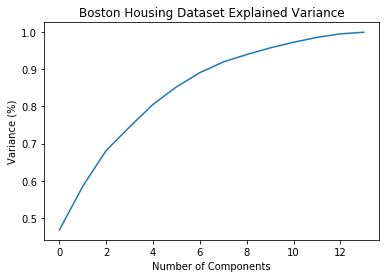

In [91]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Boston Housing Dataset Explained Variance')
plt.show()

#### Plot the new PCA components againts the medium house prices

In [92]:
# x_pca['CHAS']= y
# x_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','CHAS']
# x_pca.head()
print(x_pca)

           0         1         2         3         4         5         6   \
0   -2.087344  0.492853 -0.335991 -0.028088 -1.012801 -0.262092  0.327878   
1   -1.373382 -0.170924 -0.965964 -0.432406 -0.254645  0.303779  0.559110   
2   -2.376553  0.914027 -0.090026 -1.123913  0.032788  0.508900  0.487534   
3   -2.837779  0.194870  0.060545 -1.065682  0.460334  0.714008  0.623329   
4   -2.772916  0.433299  0.064042 -1.129637  0.382179  0.655855  0.704497   
5   -2.300919 -0.328680 -0.450377 -0.693744  0.300186  0.582847  0.648704   
6   -1.309466 -0.220849 -0.616582  0.505774 -0.989388 -0.502690  0.017373   
7   -0.929211  0.098327 -0.797257  0.534789 -1.264538 -0.658515  0.219284   
8    0.051822 -1.043435 -1.475550  1.359692 -1.654449 -0.757151  0.306939   
9   -0.908157 -0.551911 -0.818907  0.803825 -1.214845 -0.502477  0.105625   
10  -0.644015 -0.483720 -0.874816  0.781207 -1.349427 -0.524113  0.245626   
11  -1.080123 -0.402802 -0.778572  0.624602 -1.080420 -0.534124  0.070570   

#### Scatterplot PCA0 & PCA1

A scatterplot was generated to investiagte if there was a strong correlation between the first and second PCA's, which account for 57% of the variance in the data. 
Based on the output below there is not a strong linear reltionship indicating that there is no relationship between the two variables.

AttributeError: module 'seaborn' has no attribute 'plt'

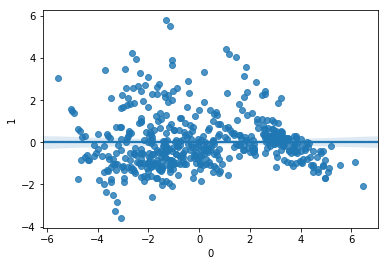

In [93]:
# use the function regplot to make a scatterplot
sns.regplot(x=x_pca[0], y=x_pca[1])
sns.plt.show()


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['MEDV']
colors = ['r']
for target, color in zip(targets,colors):
 indicesToKeep = x_pca['target'] == target
 ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
 , x_pca.loc[indicesToKeep, 'PC2']
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()

#### Plot median house value distribution

The data is split between houses alongside the river and houses not along the river. The median values of these properties were plotted.There is a normal distribution for the houses along the river and a bimodal distribution between those not along the river.

In [ ]:
#x = np.random.normal(size=100)
## Select the data where the houses are along the river
r= df.loc[df['CHAS'] == 1]
## Select the data where the houses are not along the river
s = df.loc[df['CHAS'] == 0]
#Plot distributions of houses along the river and not along the river
sns.distplot(r.MEDV)
sns.distplot(s.MEDV)

In [ ]:
### Grouping the data 



### Inferential Statistics 
#### Independant T-Test
An independant t-test was conducted on the two groups median house values. The first group r consisted of the houses along the river and the secound group s consisted of the houses not along the river. 
The results indicated that with a p-value 0f 0.07 the results are not significantly different

In [ ]:
#Independant t-test

stats.ttest_ind(r['MEDV'], s['MEDV'])

##### References 

[2] Data Cleaning with Python and Pandas: Detecting Missing Values https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b (Accessed 21.11.19)

[3]Dimension Reduction Techniques with Python https://towardsdatascience.com/dimension-reduction-techniques-with-python-f36ca7009e5c (Accessed 21.11.19)

[4]SciKit Learn https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA (Accessed 21.11.19)

[5] A complete guide to scatterplots https://chartio.com/learn/charts/what-is-a-scatter-plot/ (Accessed 24.11.19)